## Data Overview

In [2]:
import os
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
path = '../input/petfinder-pawpularity-score/'

train_df = pd.read_csv(path + 'train.csv')
test_df = pd.read_csv(path + 'test.csv')

train_jpg = glob(path + "train/*.jpg")
test_jpg = glob(path + "test/*.jpg")

In [4]:
print('train_df dimensions: ', train_df.shape)
print('train_df column names: ', train_df.columns.values.tolist())

train_df dimensions:  (9912, 14)
train_df column names:  ['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur', 'Pawpularity']


In [5]:
train_df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


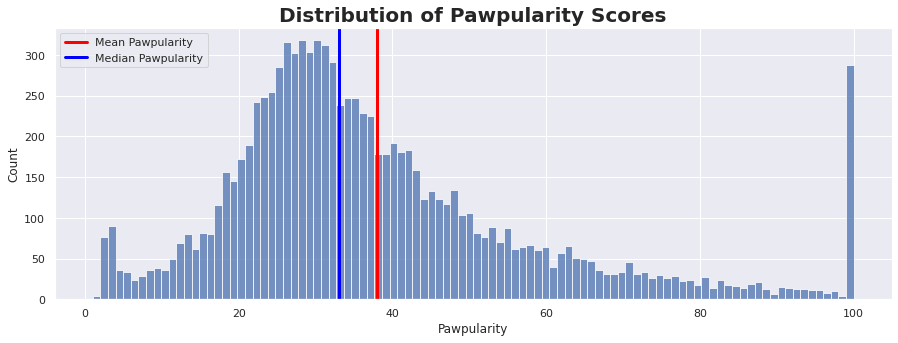

In [6]:
sns.set(rc={'figure.figsize':(15,5)})
fig = plt.figure()
sns.histplot(data=train_df, x='Pawpularity', bins=100)
plt.axvline(train_df['Pawpularity'].mean(), c='red', ls='-', lw=3, label='Mean Pawpularity')
plt.axvline(train_df['Pawpularity'].median(),c='blue',ls='-',lw=3, label='Median Pawpularity')
plt.title('Distribution of Pawpularity Scores', fontsize=20, fontweight='bold')
plt.legend()
plt.show()

In [7]:
train_df[['Pawpularity']].describe()

,Pawpularity
count,9912.000000
mean,38.039044
std,20.591990
min,1.000000
25%,25.000000
50%,33.000000
75%,46.000000
max,100.000000


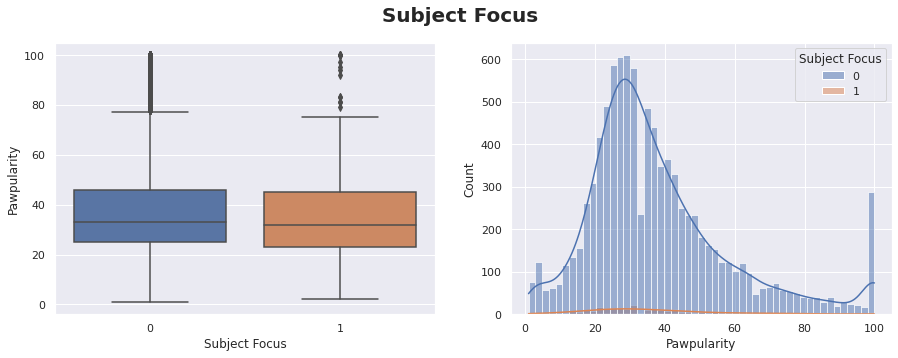

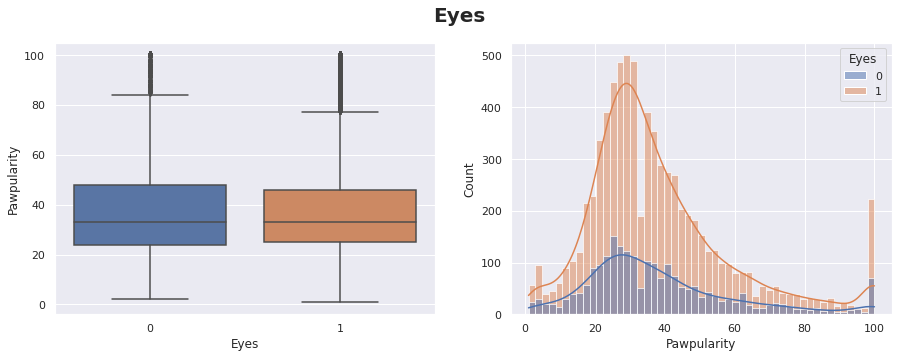

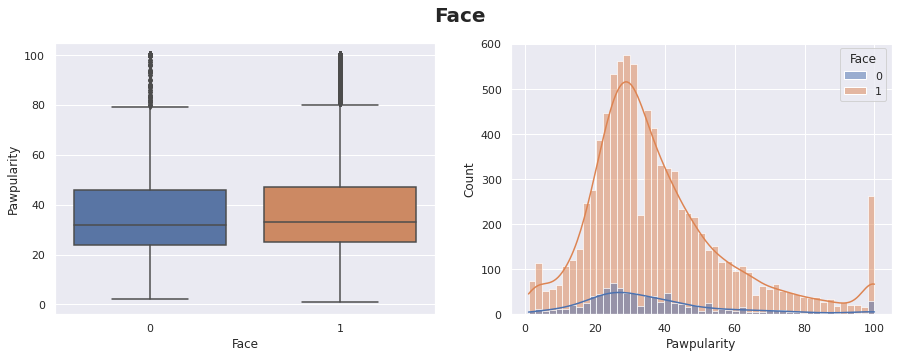

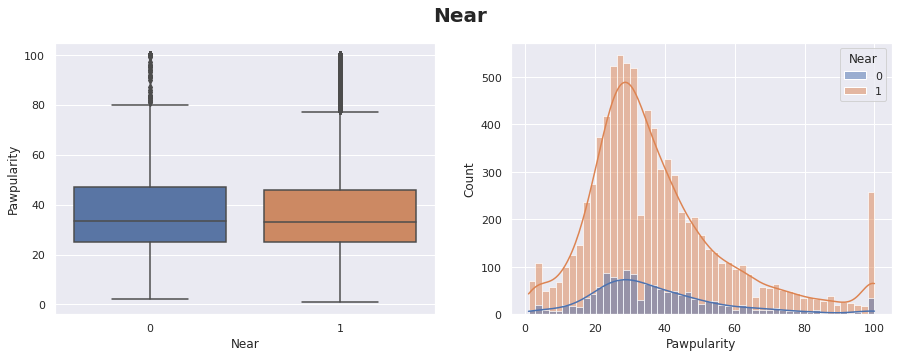

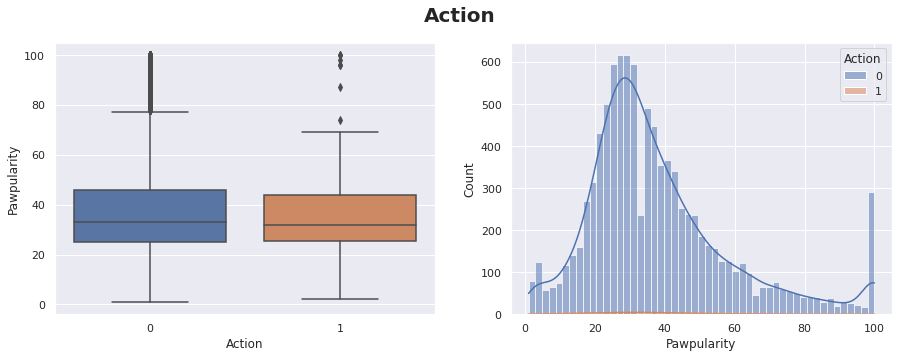

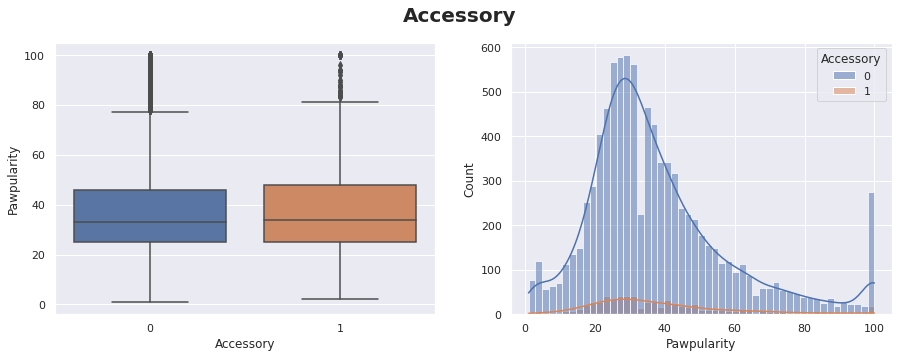

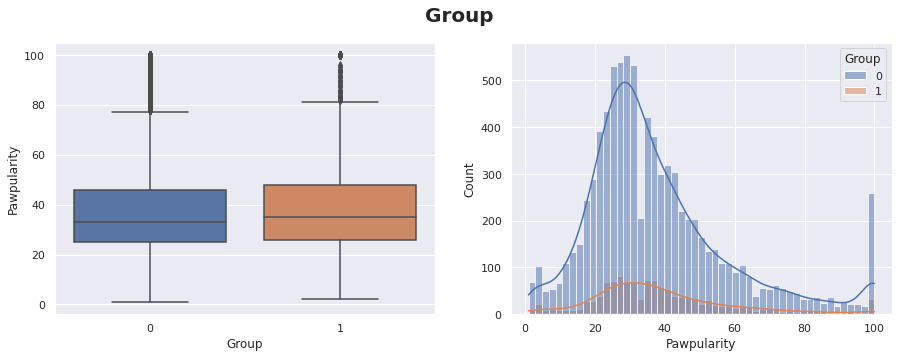

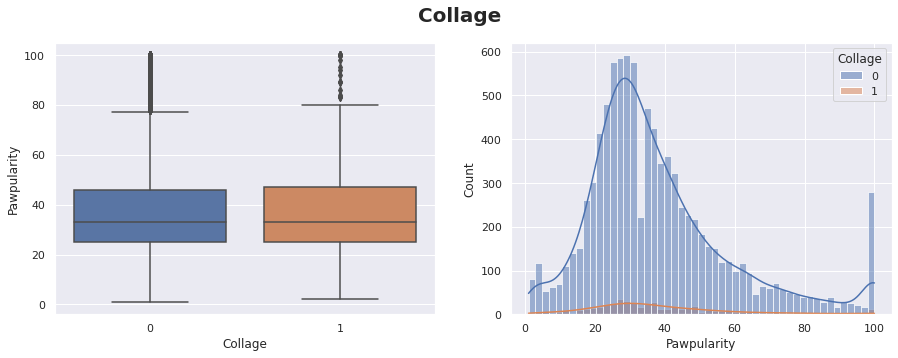

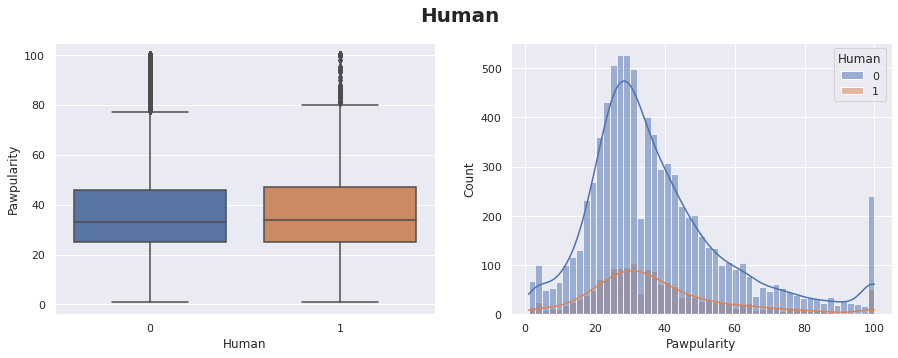

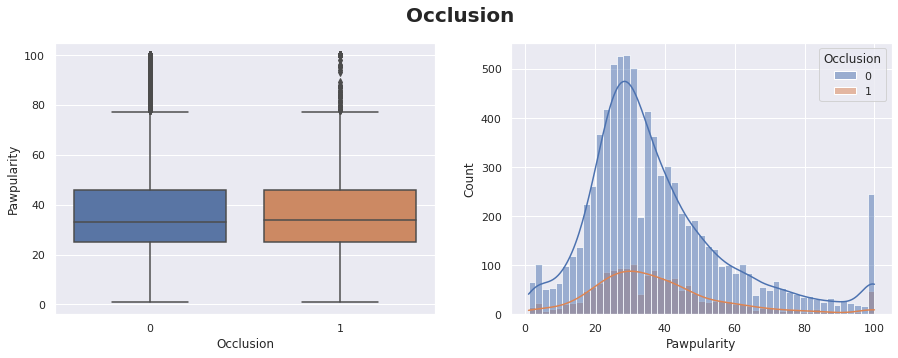

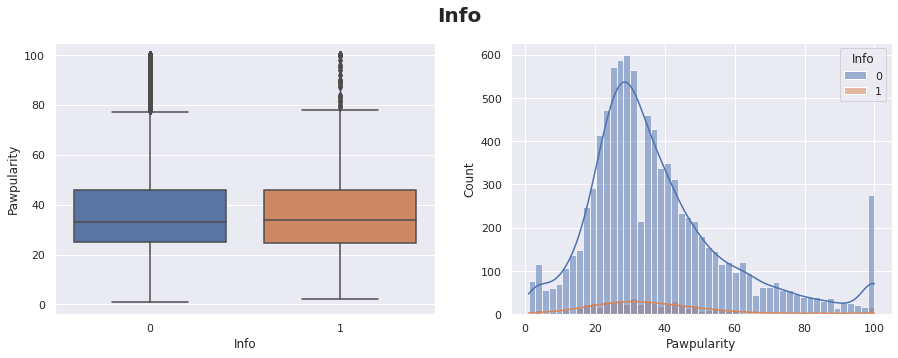

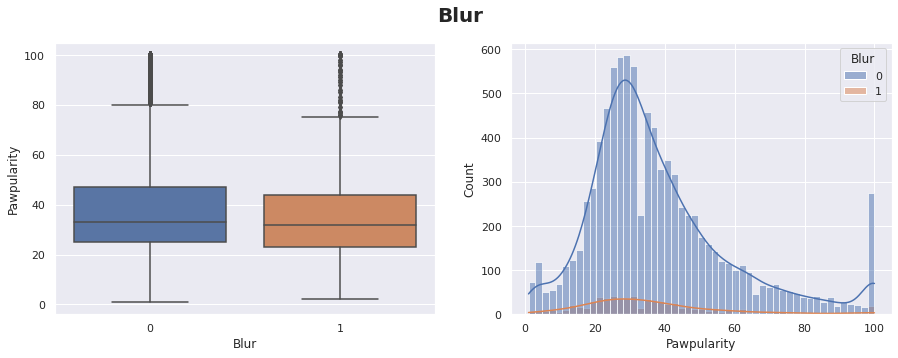

In [8]:
feature_variables = train_df.columns.values.tolist()

for variable in feature_variables[1:-1]:
    fig, ax = plt.subplots(1,2)
    sns.boxplot(data=train_df, x=variable, y='Pawpularity', ax=ax[0])
    sns.histplot(train_df, x="Pawpularity", hue=variable, kde=True, ax=ax[1])
    plt.suptitle(variable, fontsize=20, fontweight='bold')
    fig.show()

image 0's dimensions are: (960, 720, 3)


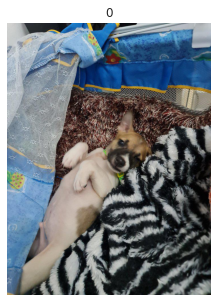

image 1's dimensions are: (720, 405, 3)


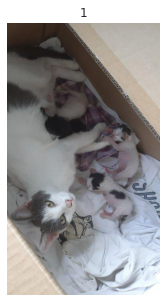

image 2's dimensions are: (514, 315, 3)


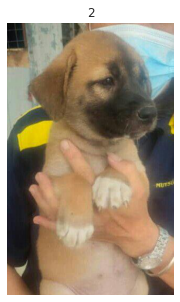

In [9]:

for x in range(3):
    image_path = train_jpg[x]
    image_array = plt.imread(image_path) 
    print("image {}'s dimensions are: {}".format(x,image_array.shape))
    plt.imshow(image_array)
    plt.title(x) 
    plt.axis('off')
    plt.show()